<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Process-data" data-toc-modified-id="Process-data-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Process data</a></span></li></ul></li></ul></li><li><span><a href="#(1)-Displacement-profiles" data-toc-modified-id="(1)-Displacement-profiles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>(1) Displacement profiles</a></span><ul class="toc-item"><li><span><a href="#Plot-2D-displacement-of-all-cells" data-toc-modified-id="Plot-2D-displacement-of-all-cells-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot 2D displacement of all cells</a></span></li><li><span><a href="#Plot-horizontal-displacement-vs-time" data-toc-modified-id="Plot-horizontal-displacement-vs-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot horizontal displacement vs time</a></span></li><li><span><a href="#Plot-MSD-vs-t" data-toc-modified-id="Plot-MSD-vs-t-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot MSD vs t</a></span></li><li><span><a href="#Plot-instantaneous-speed-vs-t" data-toc-modified-id="Plot-instantaneous-speed-vs-t-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plot instantaneous speed vs t</a></span></li></ul></li><li><span><a href="#(2)-Persistence" data-toc-modified-id="(2)-Persistence-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>(2) Persistence</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Simple-definition-of-persistence" data-toc-modified-id="Simple-definition-of-persistence-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Simple definition of persistence</a></span><ul class="toc-item"><li><span><a href="#Alternative-&quot;simple-definition&quot;-of-persistence" data-toc-modified-id="Alternative-&quot;simple-definition&quot;-of-persistence-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Alternative "simple definition" of persistence</a></span></li></ul></li><li><span><a href="#Calculate-velocity-correlations" data-toc-modified-id="Calculate-velocity-correlations-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Calculate velocity correlations</a></span></li></ul></li><li><span><a href="#Advanced-topics" data-toc-modified-id="Advanced-topics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Advanced topics</a></span><ul class="toc-item"><li><span><a href="#Model-cell-tracks-using-stochastic-differential-equations" data-toc-modified-id="Model-cell-tracks-using-stochastic-differential-equations-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model cell tracks using stochastic differential equations</a></span></li><li><span><a href="#Velocity-space-correlation-function" data-toc-modified-id="Velocity-space-correlation-function-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Velocity-space correlation function</a></span></li></ul></li></ul></li></ul></div>

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd = os.getcwd(); print("Working dir: " + cwd)

Working dir: /Users/dang/Documents/TablerLab/Code


In [4]:
data_path = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Video 1/Pilot/";
filename = "Tracks_Results_from_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_in_um_per_min.csv";
#filename = "test.csv"
loaded_data = pd.read_csv( data_path+filename )
loaded_data.head()

,Track,Slice,X,Y,Distance,Velocity,Pixel Value
0,1,1,2022,795,-1.000,-1.000,17
1,1,2,2007,777,3.023,0.302,8
2,1,3,2007,791,1.806,0.181,10
3,1,4,2024,797,2.326,0.233,15
4,1,5,2035,802,1.559,0.156,8


In [18]:
# --- Input parameters ---
video = 1; # <-- set number of the video [1, 2, 3]

video_labels = ["190305", "190314", "200120"];
pix_per_micron_all = [4.400, 5.1040, 5.1040]; # Number of pixels per micron

pix_per_micron = pix_per_micron_all[video-1]; # note Python indexing
delta_t = 1/6; # time interval between slices in hrs

### Process data

In [6]:
# Total number of cells
N_cells = len(np.unique(loaded_data.Track));
print("Number of cells = " + str(N_cells))

# Number of slices per cell
N_slices = len(np.unique(loaded_data.Slice));
print("Number of slices per cell = " + str(N_slices))

Number of cells = 11
Number of slices per cell = 73


In [7]:
# Extract X and Y coordinates for each cell
X_all = np.nan*np.zeros([N_cells, N_slices]);
Y_all = np.nan*np.zeros([N_cells, N_slices]);
tracks_all = np.unique(loaded_data.Track); # Cell track numbers

for i in range(len(tracks_all)):
    track = tracks_all[i];
    # select cell i
    data_cell_i = loaded_data.loc[loaded_data.Track == track];
    slices_cell_i = data_cell_i.Slice-1;
    
    # store data
    X_all[i, slices_cell_i] = data_cell_i.X;
    Y_all[i, slices_cell_i] = data_cell_i.Y; 
    
# Filter out inapplicable tracks, not needed anymore
# data_filter = list(map(lambda x: not all(np.isnan(x)), X_all)) and list(map(lambda x: not all(np.isnan(x)), Y_all));
# X_all = X_all_0[data_filter];
# Y_all = Y_all_0[data_filter];
# X_all.shape

In [8]:
# For plotting:
slices_all = np.array([range(N_slices) for i in range(N_cells)])/6;

# time range to plot
t_lower = 0; # starting time in hrs
t_upper = 6; # final time in hrs
slice_range = range(t_lower*6, t_upper*6); # hours*6
#slice_range = range(Nslices) #full range

# (1) Displacement profiles
Individual cells and averages.

## Plot 2D displacement of all cells

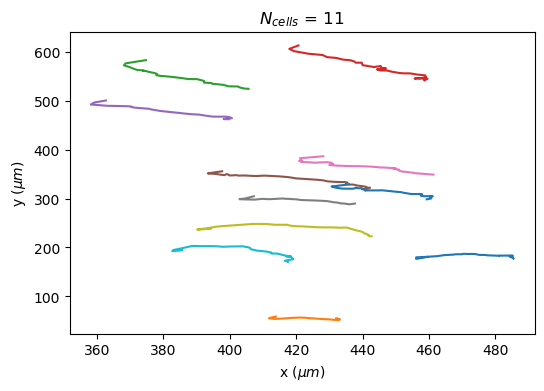

In [9]:
plt.figure(dpi=100);
plt.plot(X_all[:, slice_range].T/pix_per_micron, Y_all[:, slice_range].T/pix_per_micron)
plt.xlabel('x ($\\mu m$)')
plt.ylabel('y ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

## Plot horizontal displacement vs time
Shows displacement of cells relative to their initial position in the direction perpendicular to the front (horizontal).

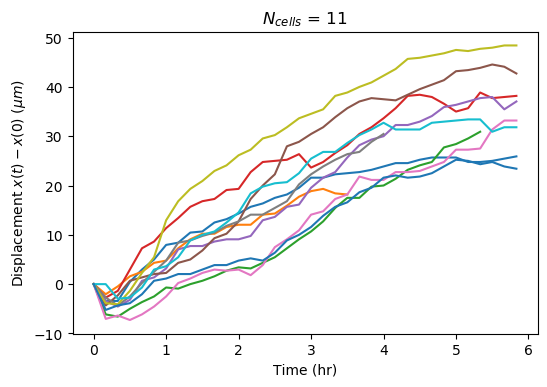

In [10]:
# Plot displacements in horizontal direction vs t
X_displacements = np.array(list(map(lambda x: x-x[0], X_all)))/pix_per_micron; # units: microns

plt.figure(dpi=100);
plt.plot(slices_all[:, slice_range].T, X_displacements[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('Displacement $x(t) - x(0)$ ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

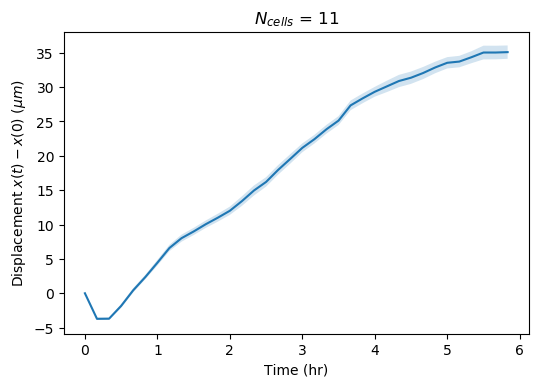

Net mean velocity over 6 hours = 6.0 microns/hr
Shaded area = standard error of the mean


In [11]:
# --- Average over all cells ---
# x, y data
slices = slices_all[0, slice_range];
X_displacements_avg = np.nanmean(X_displacements[:, slice_range], axis=0);

# Compute SEM
std_all = np.nanstd(X_displacements[:, slice_range], axis=0); # Std for each time point
n_all = np.sum(~np.isnan(X_displacements[:, slice_range]), axis=0); # no. data points per time point
sem_all = std_all/n_all;

plt.figure(dpi=100);
plt.plot(slices, X_displacements_avg)
plt.fill_between(slices, X_displacements_avg+sem_all, X_displacements_avg-sem_all, alpha=0.2)
plt.xlabel('Time (hr)')
plt.ylabel('Displacement $x(t) - x(0)$ ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

print("Net mean velocity over {} hours = {} microns/hr".format(t_upper, round(X_displacements_avg[-1]/t_upper)) )
print("Shaded area = standard error of the mean")

## Plot MSD vs t
Shows mean squared displacements of cells in 2D, MSD = $\sqrt{\langle [x(t) - x(0)]^2 + [y(t) - y(0)]^2 \rangle}$.

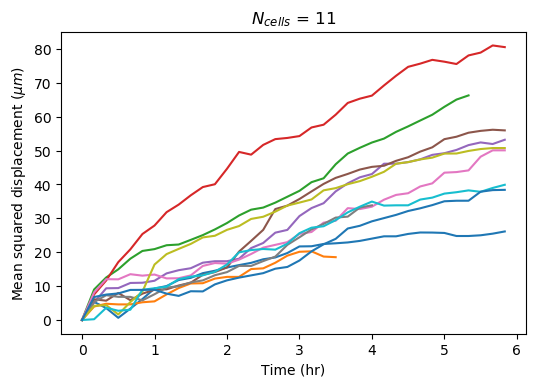

In [12]:
# Plot displacements in horizontal direction vs t
MSD_all = np.array(list(map( lambda X, Y: np.sqrt( (X-X[0])**2 + (Y-Y[0])**2) , X_all, Y_all)))/pix_per_micron; # units: microns

plt.figure(dpi=100);
plt.plot(slices_all[:, slice_range].T, MSD_all[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('Mean squared displacement ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

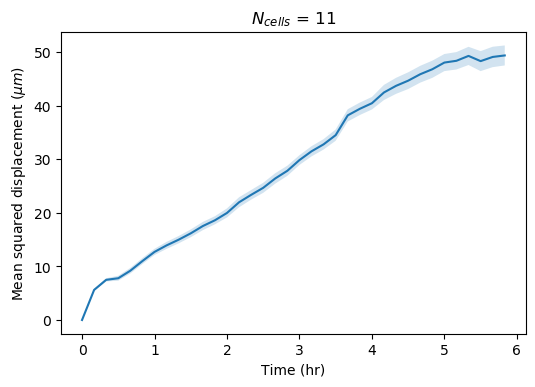

Shaded area = standard error of the mean


In [13]:
# --- Average over all cells ---
# x, y data
slices = slices_all[0, slice_range];
MSD_avg = np.nanmean(MSD_all[:, slice_range], axis=0);

# Compute SEM
std_all = np.nanstd(MSD_all[:, slice_range], axis=0); # Std for each time point
n_all = np.sum(~np.isnan(MSD_all[:, slice_range]), axis=0); # no. data points per time point
sem_all = std_all/n_all;

plt.figure(dpi=100);
plt.plot(slices, MSD_avg)
plt.fill_between(slices, MSD_avg+sem_all, MSD_avg-sem_all, alpha=0.2)
#plt.plot(slices, X_displacements_avg-sem_all)
#plt.plot(slices, X_displacements_avg+sem_all)
plt.xlabel('Time (hr)')
plt.ylabel('Mean squared displacement ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

print("Shaded area = standard error of the mean")

## Plot instantaneous speed vs t
Shows instantaneous speed (i.e. absolute distances travelled between successive time frames) vs time, defined as $\frac{\sqrt{\Delta x(t)^2 + \Delta y(t)^2}}{\Delta t}$.

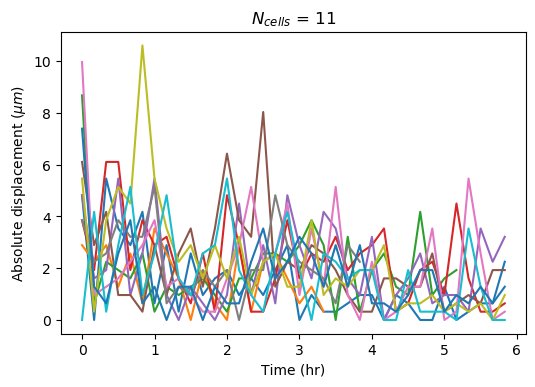

In [14]:
del_X_all = np.array(list(map(np.diff, X_all))); # X[t+1]-X[t] for all cells
del_Y_all = np.array(list(map(np.diff, Y_all))); # Y[t+1]-Y[t] for all cells
abs_displacements_all = np.sqrt(del_X_all**2 + del_X_all**2)/pix_per_micron; # units: microns

plt.figure(dpi=100);
plt.plot(slices_all[:, slice_range].T, abs_displacements_all[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('Absolute displacement ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

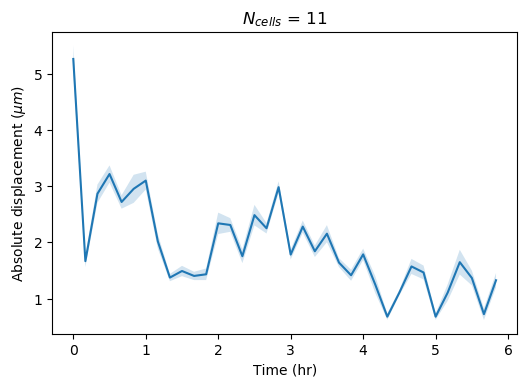

Shaded area = standard error of the mean


In [15]:
# --- Average over all cells ---
# x, y data
slices = slices_all[0, slice_range];
abs_displacements_avg = np.nanmean(abs_displacements_all[:, slice_range], axis=0);

# Compute SEM
std_all = np.nanstd(abs_displacements_all[:, slice_range], axis=0); # Std for each time point
n_all = np.sum(~np.isnan(abs_displacements_all[:, slice_range]), axis=0); # no. data points per time point
sem_all = std_all/n_all;

plt.figure(dpi=100);
plt.plot(slices, abs_displacements_avg)
plt.fill_between(slices, abs_displacements_avg+sem_all, abs_displacements_avg-sem_all, alpha=0.2)
#plt.plot(slices, X_displacements_avg-sem_all)
#plt.plot(slices, X_displacements_avg+sem_all)
plt.xlabel('Time (hr)')
plt.ylabel('Absolute displacement ($\\mu m$)')
plt.title('$N_{cells}$ = ' + str(N_cells))
plt.show()

print("Shaded area = standard error of the mean")

# (2) Persistence
Do the cells tend to continue moving in the same direction?

### Simple definition of persistence
Define persistence as the ratio between the total displacement in the x-direction and the total 2D displacement (<a href = "https://www.nature.com/articles/ncb1762#Sec27">Simpson et al., 2008</a>).

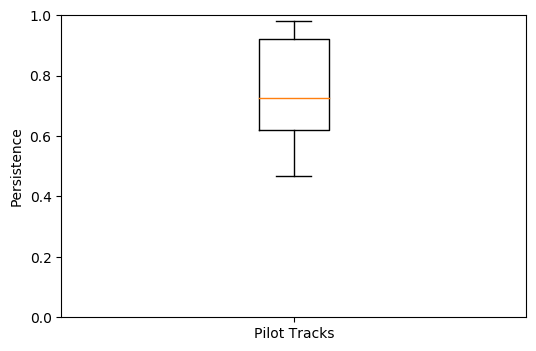

In [17]:
def calc_persistence(X_t, Y_t):
    dX = X_t[~np.isnan(X_t)][-1]-X_t[~np.isnan(X_t)][0]; # X(t_final) - X(t_initial)
    dY = Y_t[~np.isnan(Y_t)][-1]-Y_t[~np.isnan(Y_t)][0]; # Y(t_final) - Y(t_initial)
    return dX/np.sqrt(dX**2 + dY**2)

persistences_all = list(map(calc_persistence, X_all, Y_all));

plt.figure(dpi=100);
plt.boxplot(persistences_all, labels=["Pilot Tracks"])
plt.ylim(0, 1)
plt.ylabel('Persistence')
plt.show();

#### Alternative "simple definition" of persistence
Total net displacement/total displacement

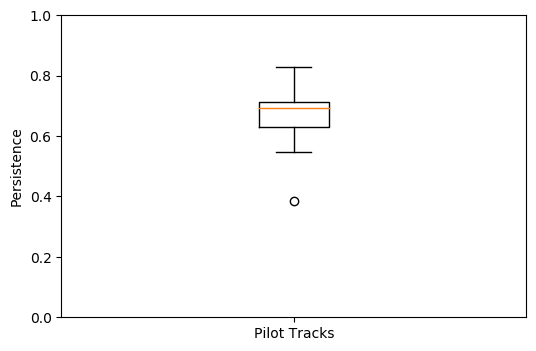

In [128]:
# calculate total displacement
del_X_all = np.array(list(map(np.diff, X_all))); # X[t+1]-X[t] for all cells
del_Y_all = np.array(list(map(np.diff, Y_all))); # Y[t+1]-Y[t] for all cells
displacements_all = np.nansum( np.sqrt(del_X_all**2 + del_Y_all**2) , axis=1 );

# calculate net displacement
net_displacements_all = np.zeros(N_cells);
for i in range(N_cells):
    X_t = X_all[i, :]; 
    Y_t = Y_all[i, :];
    dX = X_t[~np.isnan(X_t)][-1]-X_t[~np.isnan(X_t)][0]; # X(t_final) - X(t_initial)
    dY = Y_t[~np.isnan(Y_t)][-1]-Y_t[~np.isnan(Y_t)][0]; # Y(t_final) - Y(t_initial)
    net_displacements_all[i] = np.sqrt(dX**2 + dY**2);
    
persistences_all = net_displacements_all/displacements_all;

plt.figure(dpi=100);
plt.boxplot(persistences_all, labels=["Pilot Tracks"])
plt.ylim(0, 1)
plt.ylabel('Persistence')
plt.show();

### Calculate velocity correlations
This gives more rigorous way of defining persistence. <br>

Calculate autocorrelation of velocity profile. Decays exponentially for Brownian motion. <br>
Calculate Pearson correlation coefficient (autocorrelation normalized by variances).



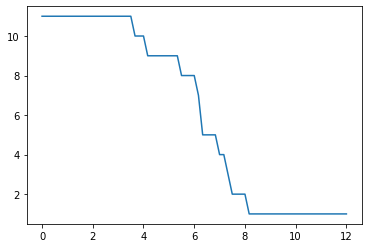

In [81]:
N_tracked_cells_vs_t = np.sum(~np.isnan(X_all), axis=0);
plt.plot(slices_all[0,:], N_tracked_cells_vs_t)

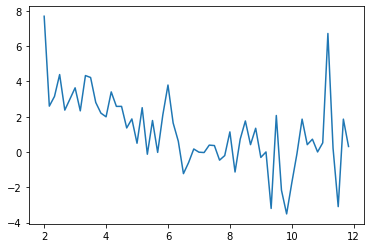

In [93]:
del_X_all = np.array(list(map(np.diff, X_all))); # X[t+1]-X[t] for all cells
del_Y_all = np.array(list(map(np.diff, Y_all))); # Y[t+1]-Y[t] for all cells
velocities_all = np.swapaxes( np.swapaxes( np.array([del_X_all, del_Y_all])/pix_per_micron, 0, 1), 1, 2); # units: microns

t_init = 12; # initial time to correlate with
correlations_all = np.zeros([N_cells, N_slices-t_init-1])*np.nan;

for i_cell in range(velocities_all.shape[0]):  
    v_temp = velocities_all[i_cell];
    correlations_all[i_cell, :] = np.dot(v_temp[t_init:], v_temp[t_init])

correlation_func = np.nanmean(correlations_all, axis=0);

plt.plot(slices_all[0,t_init:-1], correlation_func);


## Advanced topics

### Model cell tracks using stochastic differential equations
(1) Langevin dynamics or not? <br>
(2) If not, try adding memory kernel and/so velocity-dependent noise term. <br>
(3) Compare with other cell motion models (<a href="https://iopscience.iop.org/article/10.1088/1361-6633/aa65ef#ropaa65efs3"> Hakim and Silberzan, 2017 </a>).

### Velocity-space correlation function
Interesting extension of velocity correlation functions to spatial domains: <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.110.170604"> link to paper </a>. <br>